In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
# Load the data
data = "Uncleaned Sample Superstore.xlsx"
ss_data = pd.read_excel(data)
ss_data

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2.0,NaN,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3.0,NaN,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2.0,NaN,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5.0,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2.0,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2.0,NaN,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2.0,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4.0,NaN,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.1600,2.0,NaN,72.9480


In [28]:
ss_data.shape

(9995, 13)

In [29]:
ss_data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2.0,NaN,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3.0,NaN,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2.0,NaN,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5.0,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2.0,0.20,2.5164


In [30]:
ss_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9995 entries, 0 to 9994
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9995 non-null   object 
 1   Segment       9995 non-null   object 
 2   Country       9995 non-null   object 
 3   City          9995 non-null   object 
 4   State         9995 non-null   object 
 5   Postal Code   9995 non-null   int64  
 6   Region        9995 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9995 non-null   float64
 10  Quantity      9994 non-null   float64
 11  Discount      5196 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(4), int64(1), object(8)
memory usage: 1015.2+ KB


In [24]:
ss_data.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2.0,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2.0,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4.0,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2.0,0.0,72.9480
9994,Class,Consumer,United States,Westminster,California,92683,West,NaN,NaN,243.160,NaN,0.0,NaN


In [31]:
# Clean the data
ss_data.isna().any() 
# Category, Sub-category, quantity, discount, profit contain NaN

Ship Mode       False
Segment         False
Country         False
City            False
State           False
Postal Code     False
Region          False
Category         True
Sub-Category     True
Sales           False
Quantity         True
Discount         True
Profit           True
dtype: bool

In [36]:
ss_data.isna().sum()

Ship Mode          0
Segment            0
Country            0
City               0
State              0
Postal Code        0
Region             0
Category           1
Sub-Category       1
Sales              0
Quantity           1
Discount        4799
Profit             1
dtype: int64

In [40]:
# Fill NaN values with mode/mean of the column
ss_data["Discount"].fillna(0, inplace = True)
ss_data["Category"].fillna(ss_data["Category"].mode(), inplace=True)
ss_data["Sub-Category"].fillna(ss_data["Sub-Category"].mode(), inplace=True)
ss_data["Quantity"].fillna(ss_data["Quantity"].mean(), inplace = True)
ss_data["Profit"].fillna(ss_data["Profit"].mean(), inplace = True)

In [44]:
# Check for duplicates
ss_data.duplicated().any() # There are duplicates
ss_data = ss_data.drop_duplicates()

In [46]:
ss_data.duplicated().sum()

0

In [52]:
ss_data.shape

(9978, 13)

In [61]:
ss_data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9978.000000,9978.000000,9978.000000,9978.000000,9978.000000
mean,55158.725195,230.150205,3.790719,0.156263,28.690126
std,32058.861598,623.690164,2.226545,0.206451,234.446090
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.302500,2.000000,0.000000,1.726650
50%,55901.000000,54.816000,3.000000,0.200000,8.671250
75%,90008.000000,209.970000,5.000000,0.200000,29.370000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [97]:
ss_data.groupby(['Category'])['Quantity'].sum().sort_values(ascending=False) # total products sold per category

Category
Office Supplies    22861.0
Furniture           8020.0
Technology          6939.0
Name: Quantity, dtype: float64

In [94]:
ss_data.groupby(['Category'])['Profit'].sum().sort_values(ascending=False) # Technology is more profitable despite the higher 
                                                                            # demand for office supplies

Category
Technology         145454.9481
Office Supplies    122364.6608
Furniture           18421.8137
Name: Profit, dtype: float64

In [93]:
ss_data.groupby(['Sub-Category'])['Profit'].sum().sort_values(ascending=False)

Sub-Category
Copiers        55617.8249
Phones         44515.7306
Accessories    41936.6357
Paper          33944.2395
Binders        30228.0003
Chairs         26567.1278
Storage        21278.8264
Appliances     18138.0054
Furnishings    13052.7230
Envelopes       6964.1767
Art             6524.6118
Labels          5526.3820
Machines        3384.7569
Fasteners        949.5182
Supplies       -1189.0995
Bookcases      -3472.5560
Tables        -17725.4811
Name: Profit, dtype: float64

In [84]:
ss_data.groupby(['Region'])['Profit'].sum().sort_values()

Region
Central     39655.875200
South       46749.430300
East        91506.309200
West       108358.464796
Name: Profit, dtype: float64

<Axes: xlabel='Profit', ylabel='Category'>

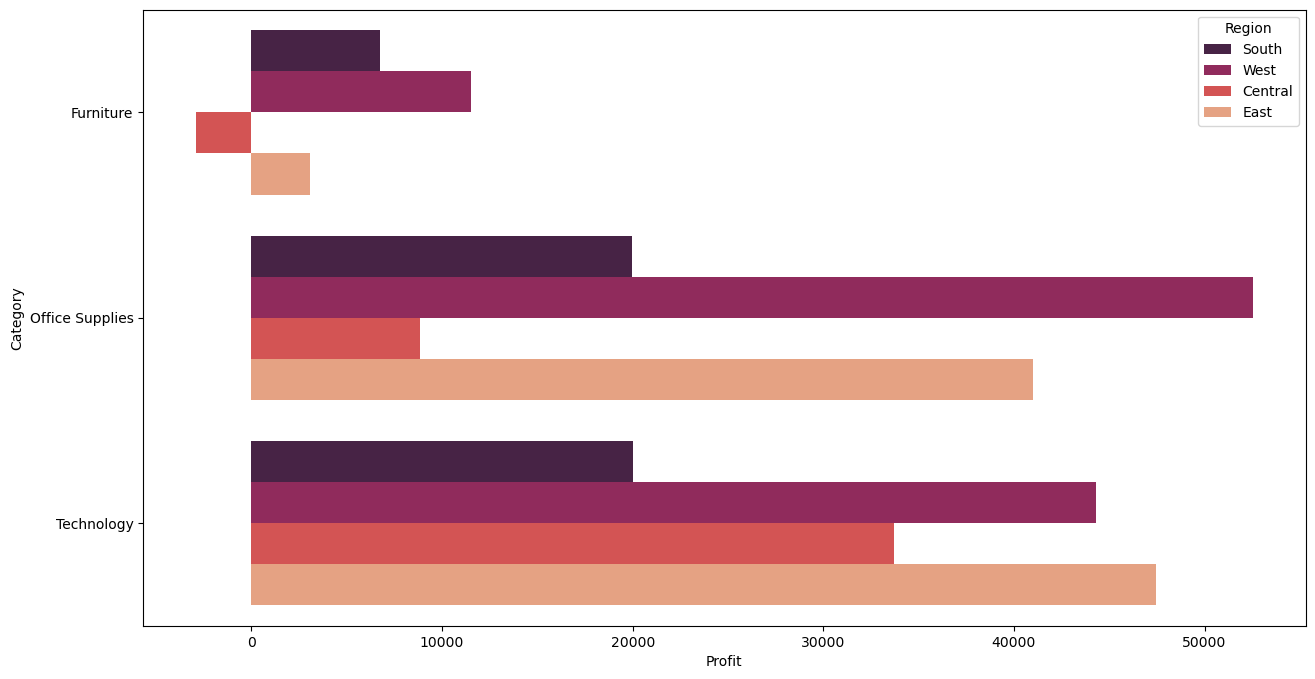

In [101]:
plt.figure(figsize=(15,8))
sns.barplot(y='Category', x='Profit', hue='Region', data=ss_data, errorbar=None, estimator=sum, palette='rocket')